# Priority Queue

### Python Libaries

In [1]:
%load_ext autoreload
%autoreload 2
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from collections import defaultdict

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Helper function saved in rapid_dem.py
%autoreload 2
import rapid_dem as rd

# Start GRASS Session
## Set your grass data location
gj.init("../../../grassdata", "nc_spm_08_grass7", "rapid-dem")

# Import Data

## PlantScope

In [ ]:
# gs.run_command("g.region", raster="walnut_creek", res=3, flags="p")
# # Import PlanetScope Before Median (2018-06-01:2019-07-14)
# gs.run_command("r.import",
#                input="data/ps_before_3m.tif", 
#                memory=3000,
#                output="ps_before_3m",
#                overwrite=True
#               )

# # Import PlanetScope After Median (2019-07-14 : 2020-08-26)
# gs.run_command("r.import",
#                input="data/ps_after_3m.tif", 
#                memory=3000,
#                output="ps_after_3m",
#                overwrite=True
#               )

# # Set color scheme to grey scale so compoosite will work correctly
# gs.run_command("r.colors", map="ps_before_3m.4,ps_before_3m.3,ps_before_3m.2,ps_before_3m.1", color="grey", flags="e")
# gs.run_command("r.composite",
#             red="ps_before_3m.3",
#             green="ps_before_3m.2",
#             blue="ps_before_3m.1",
#             output="ps_before_3m_comp",
#             flags="d",
#             overwrite=True
#         )

# gs.run_command("r.colors", map="ps_after_3m.4,ps_after_3m.3,ps_after_3m.2,ps_after_3m.1", color="grey", flags="e")
# gs.run_command("r.composite",
#             red="ps_after_3m.3",
#             green="ps_after_3m.2",
#             blue="ps_after_3m.1",
#             output="ps_after_3m_comp",
#             flags="d",
#             overwrite=True
#         )

### Before Image

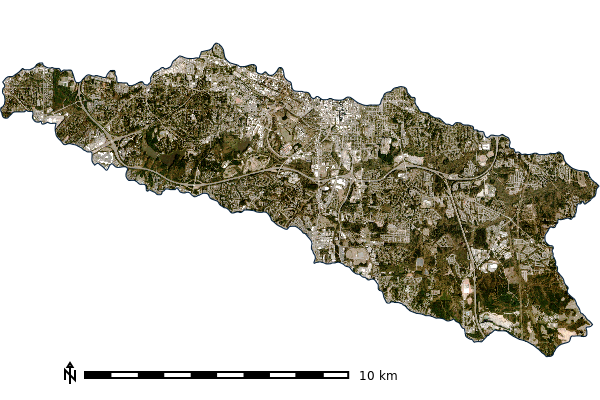

In [2]:
gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
before_30m_map = gj.GrassRenderer(filename="output/before_30m.png")
before_30m_map.d_erase()
before_30m_map.d_rast(map="ps_before_3m_comp")
before_30m_map.d_vect(map="walnut_creek", fill_color="none")
before_30m_map.d_barscale(at=(10,10,10,10), units="kilometers", flags="n")
before_30m_map.show()

### After Image

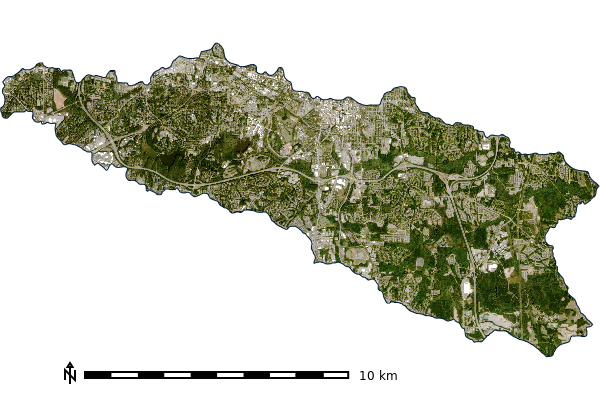

In [3]:
gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
after_30m_map = gj.GrassRenderer(filename="output/after_30m.png")
after_30m_map.d_erase()
after_30m_map.d_rast(map="ps_after_3m_comp")
after_30m_map.d_vect(map="walnut_creek", fill_color="none")
after_30m_map.d_barscale(at=(10,10,10,10), units="kilometers", flags="n")
after_30m_map.show()

## Land Cover

In [4]:
gs.run_command("g.region", raster="walnut_creek", res=30, flags="p")

# gs.run_command("r.import",
#                input="data/classified_before_30m.tif", 
#                memory=3000,
#                output="classified_before_30m",
#                overwrite=True
#               )

# gs.run_command("r.import",
#                input="data/classified_after_30m.tif", 
#                memory=3000,
#                output="classified_after_30m",
#                overwrite=True
#               )

!r.reclass input=classified_before_30m output=classified_before_30m_recl rules="grass_config/classified_reclass.txt" title="Land Cover (Before)"
!r.reclass input=classified_after_30m output=classified_after_30m_recl rules="grass_config/classified_reclass.txt" title="Land Cover (After)"
!r.colors map="classified_before_30m_recl,classified_after_30m_recl" rules="grass_config/classified_colors.txt"

Color table for raster map <classified_before_30m_recl> set to
'grass_config/classified_colors.txt'
Color table for raster map <classified_after_30m_recl> set to
'grass_config/classified_colors.txt'


### Before

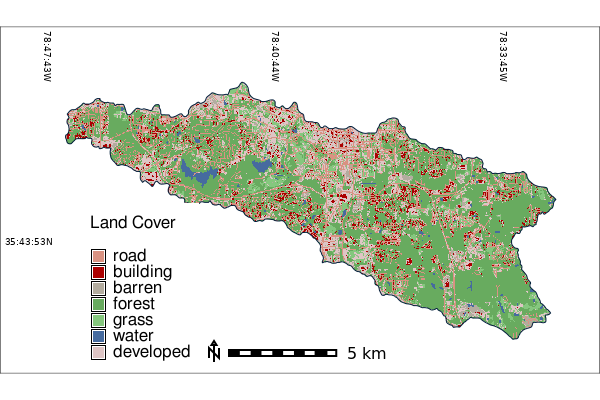

In [5]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 2500
view_reg_w = view_reg['w'] - 3000
view_reg_e = view_reg['e'] + 2000
view_reg_s = view_reg['s'] - 1500

gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")

classified_before_30m_map = gj.GrassRenderer(filename="output/classified_before_30m.png")
classified_before_30m_map.d_erase()
classified_before_30m_map.d_rast(map="classified_before_30m_recl")
classified_before_30m_map.d_vect(map="walnut_creek", fill_color="none")
classified_before_30m_map.d_legend(raster="classified_before_30m_recl", at=(7,40,15,20),title="Land Cover",title_fontsize=12,
                                fontsize=12, 
                                font="FreeSans", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")

classified_before_30m_map.d_barscale(at=(34,15.5), units="kilometers", flags="n", fontsize="16", length=5)
classified_before_30m_map.d_grid(size="00:06:59", flags="dw", width=1, color="black",text_color="black")
classified_before_30m_map.show()

### After

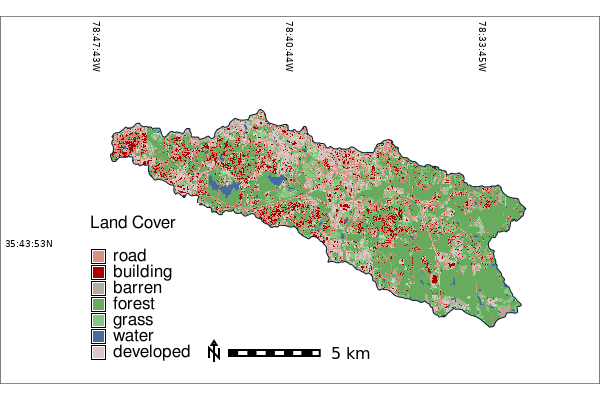

In [6]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 2500
view_reg_w = view_reg['w'] - 3000
view_reg_e = view_reg['e'] + 2000
view_reg_s = view_reg['s'] - 1500

gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

classified_before_30m_map = gj.GrassRenderer(filename="output/classified_after_30m.png")
classified_before_30m_map.d_erase()
classified_before_30m_map.d_rast(map="classified_after_30m_recl")
classified_before_30m_map.d_vect(map="walnut_creek", fill_color="none")
classified_before_30m_map.d_legend(raster="classified_after_30m_recl", at=(7,40,15,20),title="Land Cover",title_fontsize=12,
                                fontsize=12, 
                                font="FreeSans", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")

classified_before_30m_map.d_barscale(at=(34,15.5), units="kilometers", flags="n", fontsize="16", length=5)
classified_before_30m_map.d_grid(size="00:06:59", flags="dw", width=1, color="black",text_color="black")
classified_before_30m_map.show()

### Figure: Land Cover

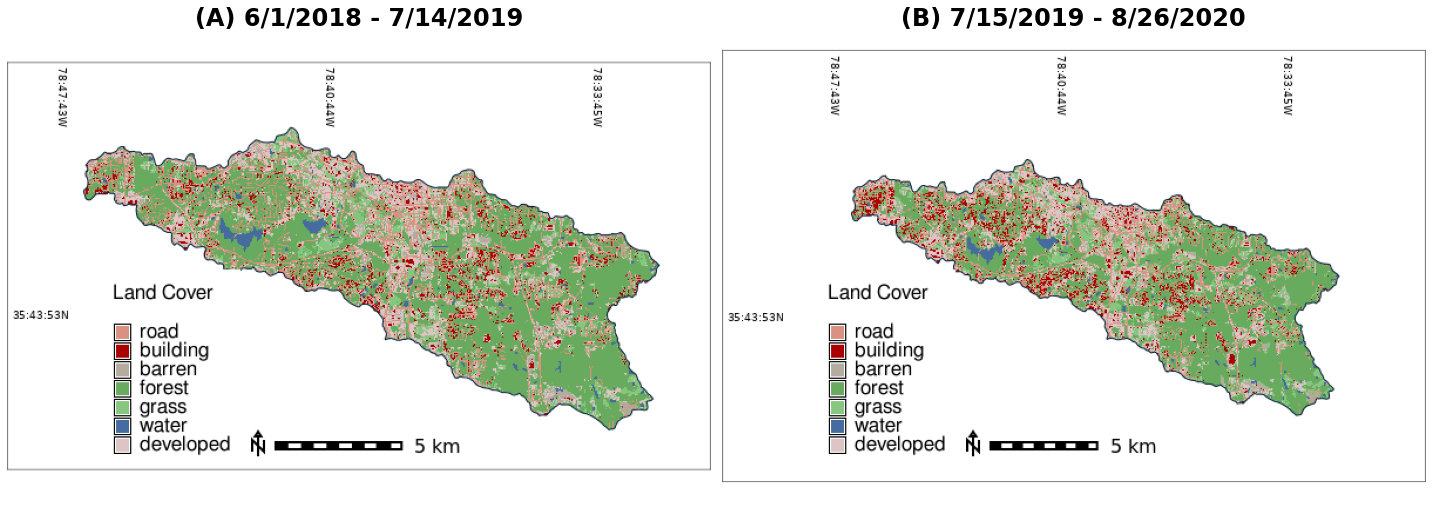

In [7]:
from PIL import Image

fig = plt.figure(figsize=(20, 18))

grs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(grs[0, 0])
ax1.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/classified_before_30m.png")
imgplot = plt.imshow(img1)
ax1.set_title('(A) 6/1/2018 - 7/14/2019',{"fontsize":24, "fontweight":"bold"})


ax2 = fig.add_subplot(grs[0, 1])
ax2.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/classified_after_30m.png")
imgplot = plt.imshow(img1)
ax2.set_title('(B) 7/15/2019 - 8/26/2020',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/before_after_classified_fig.png",bbox_inches='tight', dpi=300)

#### Compare Land Cover

In [8]:
gs.run_command("g.region", raster="classified_before_30m_recl", res=30, flags="p")

before_class_stats = gs.parse_command("r.stats", input="classified_before_30m_recl", flags="acpln")
after_class_stats = gs.parse_command("r.stats", input="classified_after_30m_recl", flags="acpln")

landcover_dict = {"class":[] , "land cover":[], "m2":[], "cells":[], "percent":[], "Time Period":[] }
print(before_class_stats)
for k in before_class_stats.keys():
    row = k.split(" ") 
    row.append("6/1/2018 - 7/14/2019")
    for i, col in enumerate(landcover_dict.keys()):
        landcover_dict[col].append(row[i])

for k in after_class_stats.keys():
    row = k.split(" ")
    row.append("7/15/2019 - 8/26/2020")
    for i, col in enumerate(landcover_dict.keys()):
        landcover_dict[col].append(row[i])  

df_landcover = pd.DataFrame(landcover_dict)
df_landcover.head(10)


{'0 road 18899733.050479 20987 15.88%': None, '1 building 7214264.138151 8011 6.06%': None, '2 barren 3572461.095500 3967 3.00%': None, '3 forest 58426444.016938 64879 49.08%': None, '4 grass 9959124.591663 11059 8.37%': None, '5 water 2231549.935631 2478 1.87%': None, '6 developed 18750242.618956 20821 15.75%': None}


class land cover               m2  cells percent            Time Period
0     0       road  18899733.050479  20987  15.88%   6/1/2018 - 7/14/2019
1     1   building   7214264.138151   8011   6.06%   6/1/2018 - 7/14/2019
2     2     barren   3572461.095500   3967   3.00%   6/1/2018 - 7/14/2019
3     3     forest  58426444.016938  64879  49.08%   6/1/2018 - 7/14/2019
4     4      grass   9959124.591663  11059   8.37%   6/1/2018 - 7/14/2019
5     5      water   2231549.935631   2478   1.87%   6/1/2018 - 7/14/2019
6     6  developed  18750242.618956  20821  15.75%   6/1/2018 - 7/14/2019
7     0       road  18899733.050479  20987  15.88%  7/15/2019 - 8/26/2020
8     1   building   9723181.862391  10797   8.17%  7/15/2019 - 8/26/2020
9     2     barren   2998814.078149   3330   2.52%  7/15/2019 - 8/26/2020

<Figure size 1440x720 with 0 Axes>

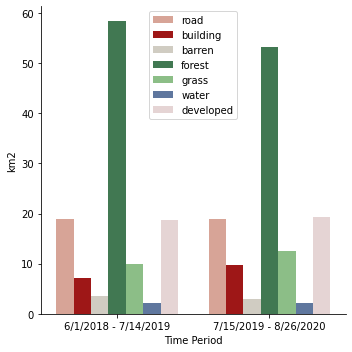

In [9]:
df_landcover['km2'] = df_landcover['m2'].apply(pd.to_numeric) / 1e6
landcover_color_palette = [
    'E29E8C', # Class 0 - road/highways         NLCD class color 22
    'B50000', # Class 1 - Building dark red     NLCD class color 24
    'D2CDC0', # Class 2 - barren                NLCD class color 31
    '38814E', # Class 3 - Forest                NLCD class color 42
    '85C77E', # Class 4 - Grass                 NLCD class color 41
    '5475A8', # Class 5 -  water                 NLCD class color 11
    'E8D1D1' # Class 5 -  developed             NLCD class color 21
]

fig = plt.figure(figsize=(20, 10))
sns.catplot(x="Time Period", 
            y="km2", 
            hue="land cover", 
            # orient="h",
            data=df_landcover,
            kind="bar", 
            legend_out=True,
            legend=False,
            palette=sns.color_palette([ "#%s" % c for c in landcover_color_palette]))
# sns.FacetGrid(df_landcover, col="time", hue="land cover", palette="tab20c")
# min_val = float(univar["min"])
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("output/land_cover_change_chart.png",bbox_inches='tight', dpi=300)

In [10]:
!r.coin first=classified_before_30m_recl second=classified_after_30m_recl units=k
!r.stats -a -c -p -l -n input=classified_before_30m_recl,classified_after_30m_recl

Tabulating Coincidence between 'classified_before_30m_recl' and
'classified_after_30m_recl'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100

+------------------------------------------------------------------------------+
|                        COINCIDENCE TABULATION REPORT                         |
|------------------------------------------------------------------------------|
| Location: nc_spm_08_gras  Mapset: rapid-dem        Date: Thu Mar  3 11:17:26 |
|                                                                              |
| Layer 1: classified_befo-- Land Cover (Before)                               |
| Layer 2: classified_afte-- Land Cover (After)                                |
| Mask:    <MASK> in mapset <rapid-dem>                                        |
|                                                                              |
| Units:   square kilometers         

# Priority Queue

## Binary Change

Mean: 38.4974641875785
Std: 194.156128751552
Change Threshold: -446.89285769130146


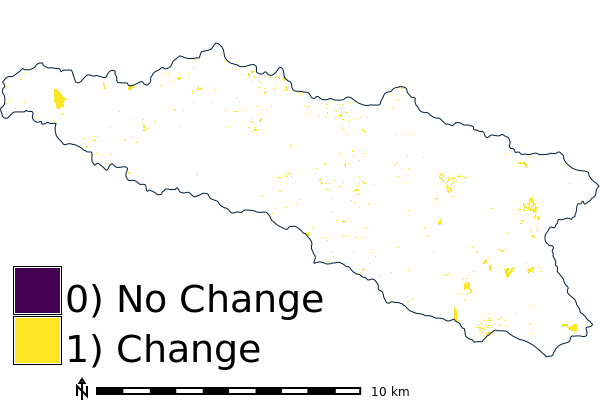

In [12]:
# %autoreload 2
# import rapid_dem as rd
# import importlib
# importlib.reload(rd)

gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)

rd.binary_change("ps_before_3m.r", "ps_after_3m.r")

gs.run_command("r.reclass", input="binary_change_mask", output="binary_change_mask_reclass", rules="grass_config/binary_change_reclass.txt", title="Binary Change")
gs.run_command("r.clump",input="binary_change_mask", output="binary_change_objects", minsize=10, flags="d")
binary_change_map = gj.GrassRenderer(filename="output/binary_change_mask.png")
binary_change_map.d_erase()
binary_change_map.d_rast(map="binary_change_mask")
binary_change_map.d_vect(map="walnut_creek", fill_color="none")
binary_change_map.d_legend(raster="binary_change_mask_reclass", at=(2,40,2,6))
binary_change_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
binary_change_map.show()

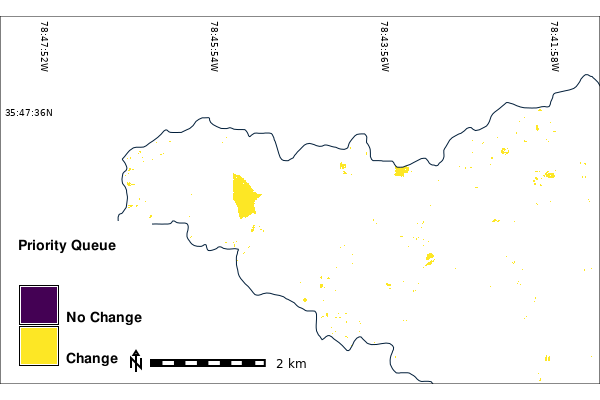

In [13]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")



binary_change_map = gj.GrassRenderer(filename="output/binary_change_mask_nw.png")
binary_change_map.d_erase()
binary_change_map.d_rast(map="binary_change_mask_reclass")
binary_change_map.d_vect(map="walnut_creek", fill_color="none")
binary_change_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
binary_change_map.d_legend(raster="binary_change_mask_reclass", at=(3,34,3,5),title="Priority Queue",title_fontsize=14,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="cb" )
binary_change_map.d_barscale(at=(21,13), units="kilometers", length=2, flags="n")

binary_change_map.show()

## Priority Change (PC)

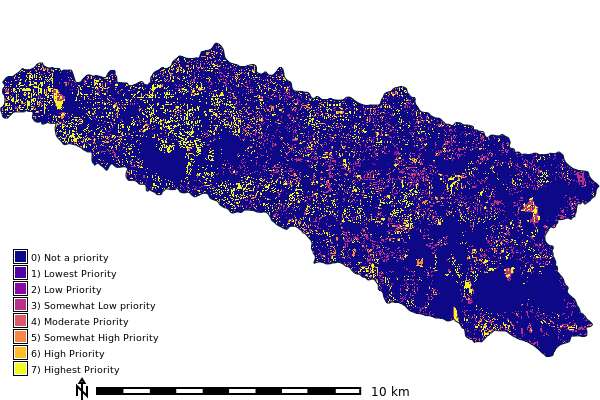

In [14]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
rd.priority_change_calc(
    before_landcover="classified_before_30m_recl", 
    after_landcover="classified_after_30m_recl", 
    output="priority_change_30m")

gs.run_command("r.reclass", input="priority_change_30m", output="priority_change_3m_reclass", rules="grass_config/priority_reclass.txt", title="Priority Change")
gs.run_command("r.colors", map="priority_change_3m_reclass", color="plasma")
priority_change_30m_map = gj.GrassRenderer(filename="output/priority_change.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="priority_change_3m_reclass")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_change_3m_reclass", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

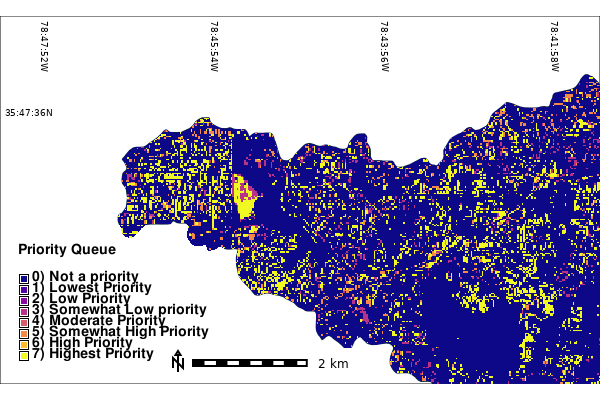

In [15]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_change_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="priority_change_3m_reclass", at=(7,33,3,6),title="Priority Queue",title_fontsize=14,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_rast(map="priority_change_30m")

priority_change_30m_map.d_barscale(at=(28,13), units="kilometers", length=2, flags="n")

priority_change_30m_map.show()

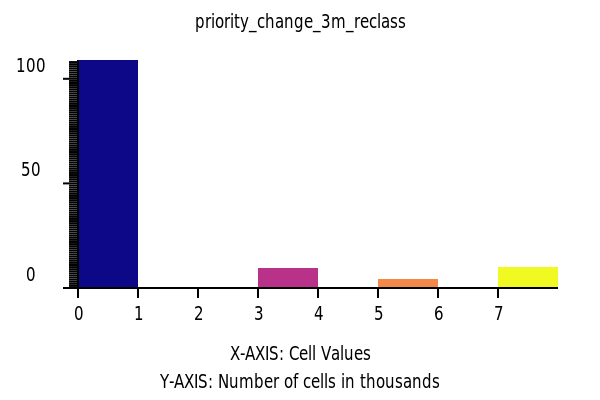

In [16]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="pa")
priority_change_30m_hist = gj.GrassRenderer()
priority_change_30m_hist.d_histogram(map="priority_change_3m_reclass")
priority_change_30m_hist.show()

## Mean Object Priority Change (MOPC)

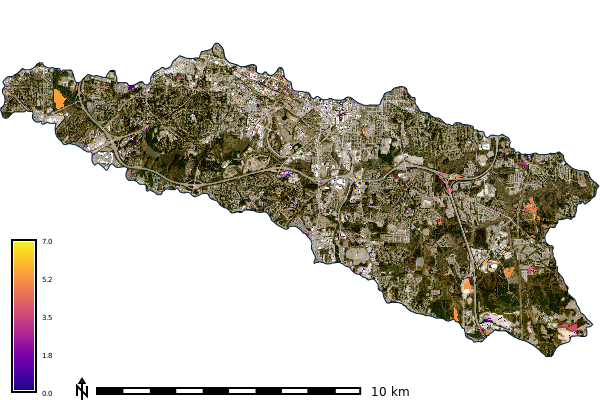

In [17]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",raster="binary_change_objects",overwrite=True)
gs.run_command("r.stats.zonal", base="binary_change_objects", cover="priority_change_30m", method="average", output="mopc", overwrite=True)
gs.run_command("r.mask",flags="r")
priority_change_30m_map = gj.GrassRenderer(filename="output/mopc.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="mopc")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="mopc", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

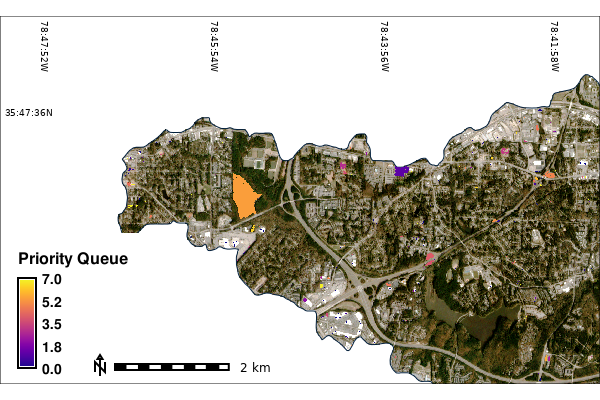

In [18]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/mopc_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="mopc")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="mopc", at=(8,30.5,3,6),title="Priority Queue",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_rast(map="mopc")

priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.show()

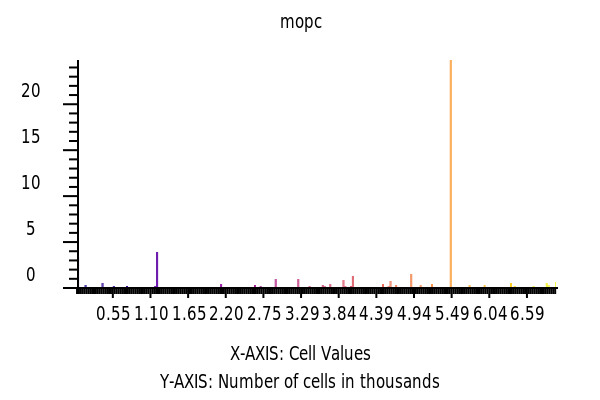

In [19]:
mopc_hist = gj.GrassRenderer()
mopc_hist.d_histogram(map="mopc")
mopc_hist.show()

## Change Object Area (COA)

### Object Size (OS)

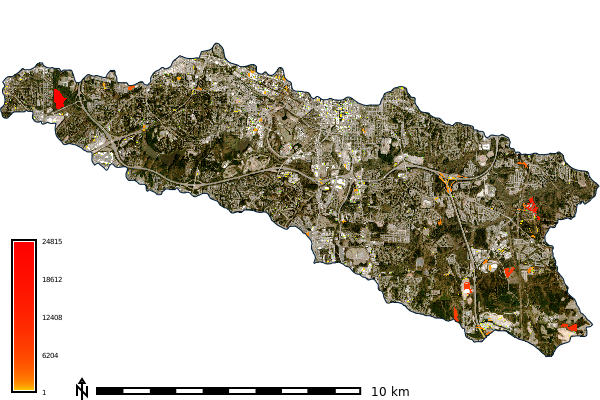

In [20]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.stats.zonal", base="binary_change_objects", cover="binary_change_mask", method="count", output="object_size", overwrite=True)
gs.run_command("r.colors", map="object_size", color="gyr", flags="g")
priority_change_30m_map = gj.GrassRenderer(filename="output/object_size.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="object_size")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="object_size", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

### Object Area (OA)

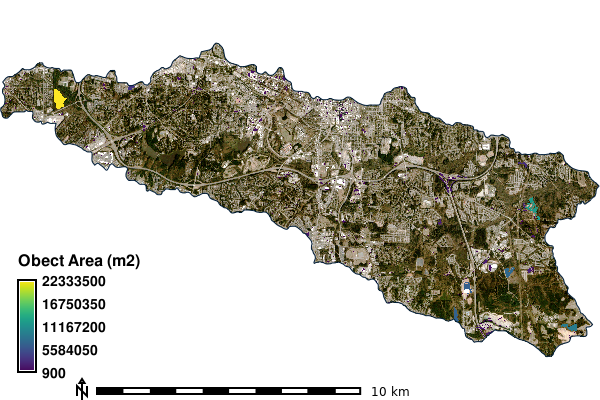

In [21]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.mapcalc(f"object_pixel_area = object_size * 900") # 30m x 30m = 900m2 (OPA)
priority_change_30m_map = gj.GrassRenderer(filename="output/object_pixel_area.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="object_pixel_area")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="object_pixel_area", at=(7,30,3,6),title="Obect Area (m2)",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white" )
priority_change_30m_map.d_barscale(at=(12,6), units="kilometers", flags="n")
priority_change_30m_map.show()

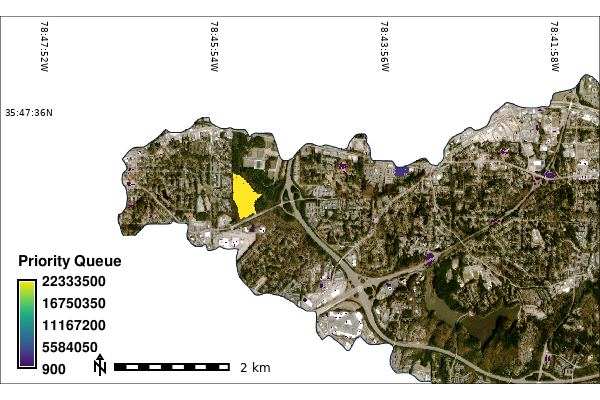

In [22]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/object_pixel_area_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="object_pixel_area")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="object_pixel_area", at=(8,30,3,6),title="Priority Queue",title_fontsize=15,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.show()

## Priority Change (PQ)

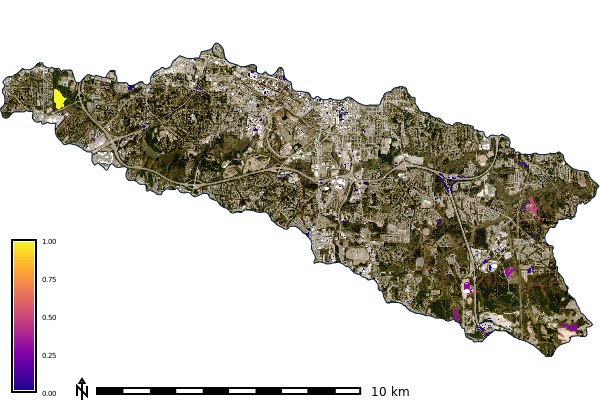

In [23]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")

gs.mapcalc(f"priority_queue = float(mopc) * float(object_pixel_area)")
univar = gs.parse_command("r.univar", map="priority_queue", flags="ge")
min_val = float(univar["min"])
max_val = float(univar["max"])
gs.run_command("r.mapcalc", 
               expression=f"priority_queue_norm = ((priority_queue - {min_val}) / ({max_val} - {min_val}))",
               overwrite=True)
gs.mapcalc("priority_queue_norm_no_zeros = if(priority_queue_norm > 0, priority_queue_norm, null())")
gs.run_command("r.colors", map="priority_queue_norm_no_zeros", color="plasma")

# gs.run_command("r.reclass", input="priority_queue_norm_no_zeros", output="priority_queue_norm_recl", rules="grass_config/priority_reclass.txt", title="Priority Queue")
# gs.run_command("r.colors", map="priority_queue_norm_recl", rules="grass_config/priority_colors.txt")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_norm_no_zeros")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_queue_norm_no_zeros", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

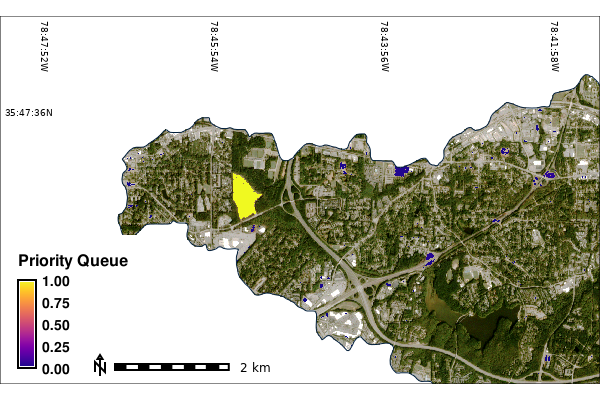

In [24]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_norm_no_zeros")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="priority_queue_norm_no_zeros", at=(8,30,3,6),title="Priority Queue",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.show()

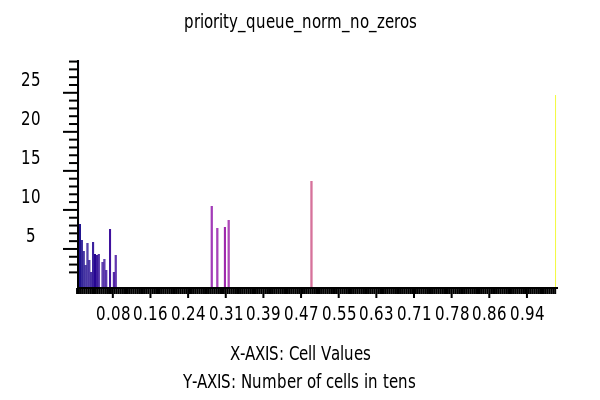

In [25]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="p")
priorityQueueMulti30m_hist = gj.GrassRenderer(filename="output/priority_queue_norm_hist.png")
priorityQueueMulti30m_hist.d_histogram(map="priority_queue_norm_no_zeros")
priorityQueueMulti30m_hist.show()

## Priority Queue Vector (PQV)

In [27]:
!r.fill.stats input=priority_queue_norm_no_zeros output=priority_queue_norm_filled uncertainty=uncertainty distance=4 mode=mode cells=5
!r.to.vect input=priority_queue_norm_filled output=priority_queue_norm type=area -vs # Do not overwrite this file it has the validation data
# Add and area field
!v.db.addcolumn map=priority_queue_norm columns="area double precision"
!v.to.db map=priority_queue_norm option=area columns=area
!v.colors map=priority_queue_norm use=attr column=value color=plasma

W-E size of neighborhood is 9 cells.
S-N size of neighborhood is 9 cells.
Input data range is 0.000022 to 1.000000.
Input data type is 'double' (8 bytes) and output data type is 'double' (8
bytes).
Minimal estimated memory usage is 0.120 MB.
Interpolating:
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
r.fill.stats complete. Processing time was 0h0m0s.
         written to the table.
Extracting areas...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing areas...
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
Building topology for vector map <priority_queue_norm@rapid-dem>...
Registering primitives...
Building areas...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  6

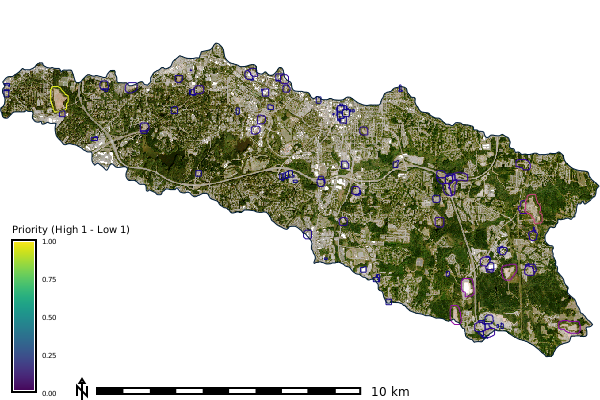

In [28]:
priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_vect.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_vect(map="priority_queue_norm", fill_color="none")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(2,40,2,6), title="Priority (High 1 - Low 1)", title_fontsize=10)

priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

### Validation

In [34]:
import pandas as pd
import sqlite3
 
# Read in the attribute table
sqlpath = gs.read_command("db.databases", driver="sqlite").replace('\n', '')
con = sqlite3.connect(sqlpath)
sqlstat="SELECT * FROM priority_queue_norm_validation"
df = pd.read_sql_query(sqlstat, con)
con.close()
df[(df.value == 0) & (df.noise == 0)].describe()

cat  value           area  noise
count    3.000000    3.0       3.000000    3.0
mean   116.333333    0.0   69112.500000    0.0
std     64.933299    0.0   72318.018372    0.0
min     42.000000    0.0   19575.000000    0.0
25%     93.500000    0.0   27618.750000    0.0
50%    145.000000    0.0   35662.500000    0.0
75%    153.500000    0.0   93881.250000    0.0
max    162.000000    0.0  152100.000000    0.0

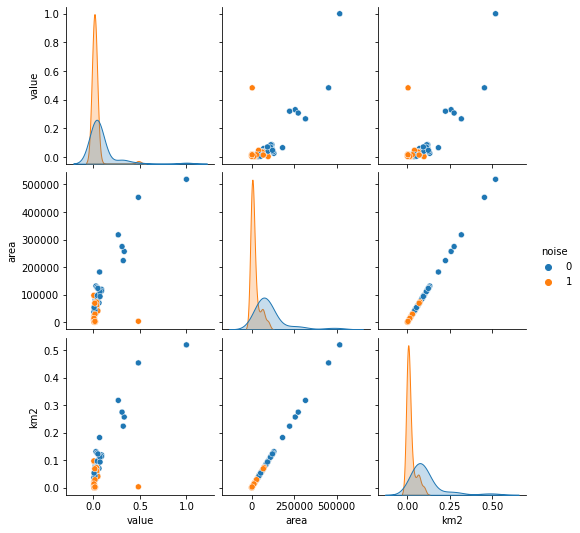

In [35]:
df_priority = df[df.value > 0].drop(columns=['cat'])
df_priority['km2'] = df_priority['area'].apply(lambda x : x/1e6)
sns.pairplot(df_priority, hue="noise")

In [117]:
df_priority_clean_med = df_priority[(df_priority["km2"] > df_priority["km2"].median()) & (df_priority["value"] > df_priority["value"].median())]
df_priority_clean_med.groupby("noise").describe()

value                                                              \
      count      mean       std       min       25%       50%       75%   
noise                                                                     
0      38.0  0.108071  0.183047  0.016529  0.035687  0.046957  0.068745   
1       4.0  0.035124  0.008940  0.026296  0.030240  0.033434  0.038317   

                 area                 ...                         km2  \
            max count           mean  ...         75%       max count   
noise                                 ...                               
0      1.000000  38.0  129434.210526  ...  122765.625  518850.0  38.0   
1      0.047333   4.0   58837.500000  ...   64490.625   73350.0   4.0   

                                                                            
           mean       std       min       25%       50%       75%      max  
noise                                                                       
0      0.129434  0.106465  0.042975  0.071269  0.096019  0.122766  0.51885  
1      0.058838  0.013242  0.041287  0.054703  0.060356  0.064491  0.07335  

[2 rows x 24 columns]

In [36]:
# Calculate confidence
n_size = []
n_correct = []
n_error = []
n_perc_error = []
nf_size = []
nf_correct = []
nf_error = []
nf_perc_error = []
nf_perc_loss_e = []
nf_perc_loss_c = []
area_thres = []
value_thres = []
df_conf_envelope = pd.DataFrame({})
for n in range(500):
    samp = df_priority.sample(frac=0.8, replace=False, random_state=n)
    samp_area_median = samp.km2.median()
    samp_value_median = samp.value.median()
    n_total = samp.count().value
    n_size.append(n_total)
    correct_total = samp[samp.noise == 0].count().value
    n_correct.append(correct_total)
    error_total = samp[samp.noise == 1].count().value
    n_error.append(error_total)
    error_rate = (error_total / (n_total)) * 100.0
    n_perc_error.append(error_rate)
    area_thres.append(samp_area_median)
    value_thres.append(samp_value_median)
    samp_filtered = samp[(samp["km2"] > samp_area_median) & (samp["value"] > samp_value_median)]
    n_filtered = samp_filtered.count().value
    nf_size.append(n_filtered)
    nf_error_count = samp_filtered[samp_filtered.noise == 1].count().value
    nf_error.append(nf_error_count)
    nf_correct_count = samp_filtered[samp_filtered.noise == 0].count().value
    nf_correct.append(nf_correct_count)
    nf_error_rate = (nf_error_count / (n_filtered)) * 100.0
    nf_perc_error.append(nf_error_rate)
    nf_loss_e = ((error_total - nf_error_count) / error_total)*100
    nf_perc_loss_e.append(nf_loss_e)
    nf_loss_c = ((correct_total - nf_correct_count) / correct_total)* 100
    nf_perc_loss_c.append(nf_loss_c)

    
df_conf_envelope = pd.DataFrame({
    "n_size": n_size,
    "n_correct":n_correct,
    "n_error":n_error,
    "n_perc_error": n_perc_error,
    "nf_size": nf_size,
    "nf_correct": nf_correct,
    "nf_error": nf_error,
    "nf_perc_error":nf_perc_error,
    "nf_perc_loss_e": nf_perc_loss_e,
    "nf_perc_loss_c": nf_perc_loss_c,
    "area_thres": area_thres,
    "value_thres": value_thres
})

df_conf_envelope.head()

n_size  n_correct  n_error  n_perc_error  nf_size  nf_correct  nf_error  \
0      87         38       49     56.321839       32          28         4   
1      87         41       46     52.873563       33          30         3   
2      87         41       46     52.873563       32          29         3   
3      87         39       48     55.172414       33          30         3   
4      87         41       46     52.873563       36          33         3   

   nf_perc_error  nf_perc_loss_e  nf_perc_loss_c  area_thres  value_thres  
0      12.500000       91.836735       26.315789    0.033075     0.015778  
1       9.090909       93.478261       26.829268    0.037463     0.015778  
2       9.375000       93.478261       29.268293    0.037463     0.015778  
3       9.090909       93.750000       23.076923    0.041287     0.015778  
4       8.333333       93.478261       19.512195    0.042075     0.015778

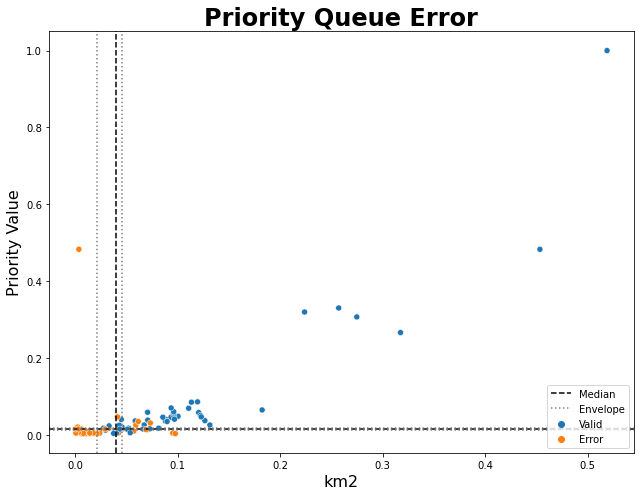

In [37]:
fig = plt.figure(figsize=(9, 7))
df_priority['Legend'] = df_priority.noise.map({0:"Valid", 1: "Error"})
ax = sns.scatterplot(data=df_priority, x="km2", y="value", hue="Legend")
ax.set_title('Priority Queue Error',{"fontsize":24, "fontweight":"bold"})
ax.set_xlabel('km2', fontsize=16)
ax.set_ylabel('Priority Value', fontsize=16)
plt.axvline(df_priority["km2"].median(), color='black', ls="--")
plt.axvline(df_conf_envelope["area_thres"].max(), color='grey', ls=":") #max
plt.axvline(df_conf_envelope["area_thres"].min(), color='grey', ls=":") #min
plt.axhline(df_priority["value"].median(), color='black', ls="--", label="Median")
plt.axhline(df_conf_envelope["value_thres"].max(), color='grey', ls=":") #max
plt.axhline(df_conf_envelope["value_thres"].min(), color='grey', ls=":", label="Envelope") #min
ax.legend(loc='lower right')
plt.tight_layout()
plt.savefig("output/priority_queue_error.png",bbox_inches='tight')

In [38]:
area_thres = df_priority["km2"].median()
priority_thres = df_priority["value"].median()
threshold_query = f"area > {area_thres} AND value > {priority_thres}"
gs.run_command("v.extract", overwrite=True, input="priority_queue_norm", where=threshold_query, output="priority_queue_clean")
gs.run_command("v.colors", map="priority_queue_clean", use="attr", column="value", color="plasma")

# Priority Context Map

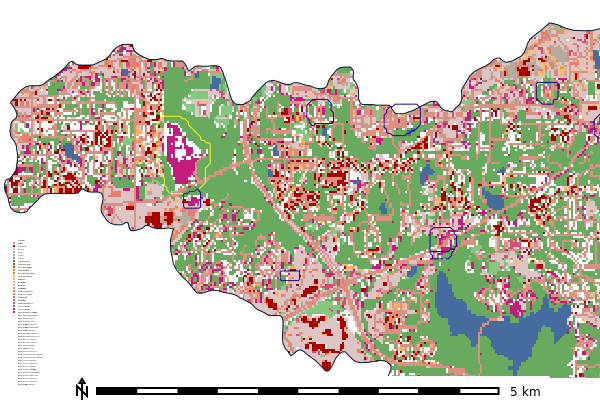

In [39]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
rd.land_change_action("land_change_action_30m")

gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/land_change_action_30m.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="land_change_30m")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_vect(map="priority_queue_clean", fill_color="none")

priority_change_30m_map.d_legend(raster="land_change_30m", at=(2,40,2,6), flags="ncd")
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

In [40]:
gs.run_command("g.region", raster="ps_after_3m_comp", res=3, flags="pa")
!v.to.rast input=priority_queue_clean output=priority_queue_clean use=cat memory=3000 --overwrite
gs.run_command("r.neighbors",input="land_change_basic_actions_30m",
               method="mode,diversity,count",
               size=15,
               selection="priority_queue_norm_no_zeros",
               output="priority_queue_context_mode,priority_queue_context_diversity,priority_queue_context_count", overwrite=True)
gs.run_command("r.reclass", input="priority_queue_context_mode", rules="grass_config/land_change_zonal_action_reclass.txt", title="Land Change Actions",output="priority_queue_context_mode_reclass")

gs.run_command("r.mode",
               base="priority_queue_clean",
               # base="priority_queue_int_mask",
               cover="priority_queue_context_mode",
               output="priority_queue_context_zonal", overwrite=True)
gs.run_command("r.reclass", input="priority_queue_context_zonal", rules="grass_config/land_change_zonal_action_reclass.txt", title="Land Change Actions",output="priority_queue_context")


Reading areas...
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
v.to.rast complete.


In [41]:
!v.to.rast input=priority_queue_clean output=priority_queue_clean_med use=cat memory=3000 label_column=value --overwrite
gs.run_command("g.region", raster="ps_after_3m_comp", res=3, flags="pa")

priority_change_context = gs.parse_command("r.stats", 
                                           input="priority_queue_clean_med,priority_queue_context",#,priority_queue_context_mode_reclass", 
                                           flags="acpln", separator="|")
landcover_change_dict = {
    # "east":[],"north":[],
    "ObjectId":[], "Priority Value":[],"Action Class":[],"Action":[],
    # "Mode Action Class":[],"Mode Action":[],
    "m2":[], "cells":[], "percent":[] }
for k in priority_change_context.keys():
    row = k.split("|") 
    for i, col in enumerate(landcover_change_dict.keys()):
        landcover_change_dict[col].append(row[i])

df_landcover_change = pd.DataFrame(landcover_change_dict)

df_landcover_change['km2'] = df_landcover_change['m2'].apply(pd.to_numeric) / 1e6
df_landcover_change['rank'] = df_landcover_change['Priority Value'].rank(ascending=False, method="dense")

df_landcover_change = df_landcover_change.sort_values(by="Priority Value",ascending=False)
df_landcover_change.head(10)

Reading areas...
   0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72  76  80  84  88  92  96 100
Writing raster map...
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
v.to.rast complete.


ObjectId Priority Value Action Class           Action             m2  \
8        15       1.000000            8  Forest Clearing  498150.000000   
29       73       0.489188            8  Forest Clearing  464850.000000   
38       93       0.315260            8  Forest Clearing  269100.000000   
44      105       0.306107            8  Forest Clearing  217530.000000   
43      102       0.290811            2     New Building  268110.000000   
45      108       0.279973            8  Forest Clearing  316575.000000   
37       87       0.080569            8  Forest Clearing  104175.000000   
31       75       0.080369            8  Forest Clearing  105795.000000   
47      115       0.075947            8  Forest Clearing   87984.000000   
33       77       0.069199            8  Forest Clearing  112140.000000   

    cells percent       km2  rank  
8   55350   9.37%  0.498150   1.0  
29  51650   8.74%  0.464850   2.0  
38  29900   5.06%  0.269100   3.0  
44  24170   4.09%  0.217530   4.0  
43  29790   5.04%  0.268110   5.0  
45  35175   5.95%  0.316575   6.0  
37  11575   1.96%  0.104175   7.0  
31  11755   1.99%  0.105795   8.0  
47   9776   1.65%  0.087984   9.0  
33  12460   2.11%  0.112140  10.0

In [42]:
gs.run_command("v.db.addcolumn", map="priority_queue_clean", columns="rank double precision")
for index, row in df_landcover_change.iterrows():
    query = f'cat = {row["ObjectId"]}'
    # print(query)
    # I'm sure there is a better way to do this but this will work for now
    gs.run_command("v.db.update", map="priority_queue_clean", column="rank", qcol=row["rank"], where=query)

In [43]:
df_landcover_change.groupby(by=["Action"]).describe()

km2                                                    \
                     count      mean       std       min       25%       50%   
Action                                                                         
Demolished Developed   9.0  0.070504  0.032639  0.020385  0.063495  0.075240   
Forest Clearing       27.0  0.137879  0.119294  0.023175  0.083880  0.100215   
New Building           8.0  0.082326  0.077479  0.023193  0.055339  0.066424   
New Developed Area     4.0  0.073508  0.010322  0.066375  0.068299  0.069413   

                                          rank                              \
                           75%       max count       mean        std   min   
Action                                                                       
Demolished Developed  0.083430  0.125055   9.0  29.444444   9.786612  18.0   
Forest Clearing       0.126342  0.498150  27.0  19.555556  14.134881   1.0   
New Building          0.070015  0.268110   8.0  30.375000  14.647647   5.0   
New Developed Area    0.074621  0.088830   4.0  35.000000   7.118052  25.0   

                                               
                       25%   50%    75%   max  
Action                                         
Demolished Developed  21.0  28.0  38.00  44.0  
Forest Clearing        8.5  16.0  30.00  48.0  
New Building          23.0  33.5  41.25  46.0  
New Developed Area    32.5  37.0  39.50  41.0

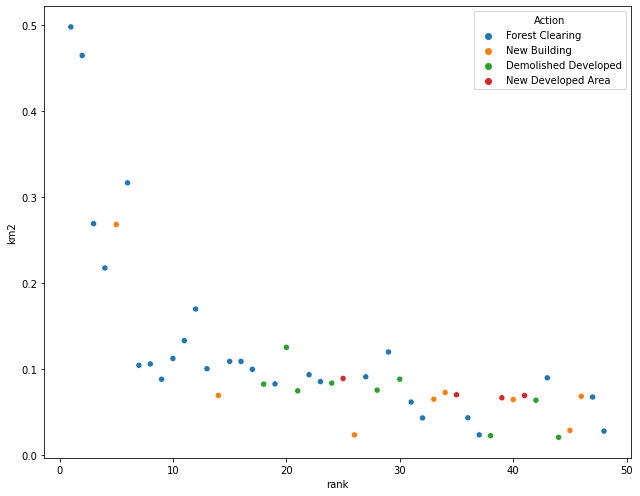

In [44]:
fig = plt.figure(figsize=(9, 7))
sns.scatterplot(x="rank", y="km2", hue="Action", data=df_landcover_change) #, palette=sns.color_palette([ "#%s" % c for c in landcover_color_palette]))
plt.tight_layout()
plt.savefig("output/priority_queue_error.png",bbox_inches='tight',dpi=300)

# Figure: Priority Context

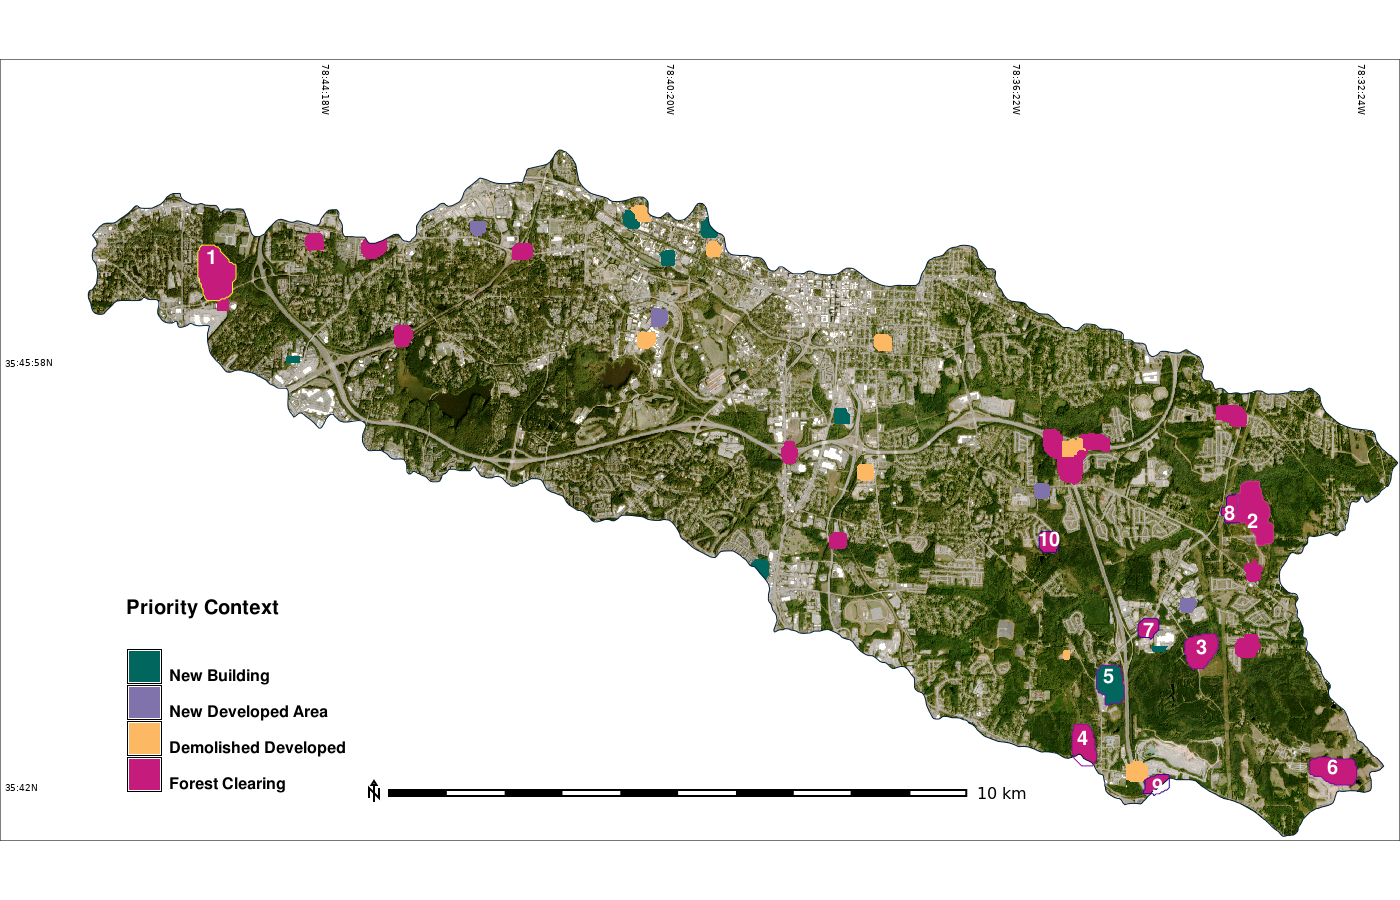

In [52]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
gs.run_command("g.region",
               raster="walnut_creek",
               # region="nw_one_third",
               res=3, flags="pa")
gs.run_command("r.colors", map="priority_queue_context", raster="land_change_basic_actions_30m")

view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 1500
gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               # region="nw_one_third",
               res=3, flags="pa")
priority_change_30m_map = gj.GrassRenderer(height=900, width=1400,filename="output/land_change_basic_actions_30m.png")
priority_change_30m_map.d_erase()

priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_context")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_vect(map="priority_queue_clean",
                               fill_color="none", color="black",
                               attribute_column="rank", 
                               where="rank <= 10",
                               label_color="white", xref="center", yref="center",
                               label_size=20, font="FreeSans:Bold")
# priority_change_30m_map.d_vect_thematic(map="priority_queue_clean_med", column="rank", algorithm="equ", nclasses=5, colors="254:240:217,253:204:138,252:141:89,227:74:51,179:0:0", fill_color="none",legend_title="Priority Queue")

priority_change_30m_map.d_legend(raster="priority_queue_context", at=(10,30,9,50),title="Priority Context",title_fontsize=20, use=[2,3,7,8],
                                fontsize=16, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")
priority_change_30m_map.d_barscale(at=(26,13.5), units="kilometers", flags="n", fontsize="16")
priority_change_30m_map.d_grid(size="00:03:58", flags="dw", width=1, color="black",text_color="black")

priority_change_30m_map.show()

# Figure: Site 1 Before and After

## Site 1 - Before

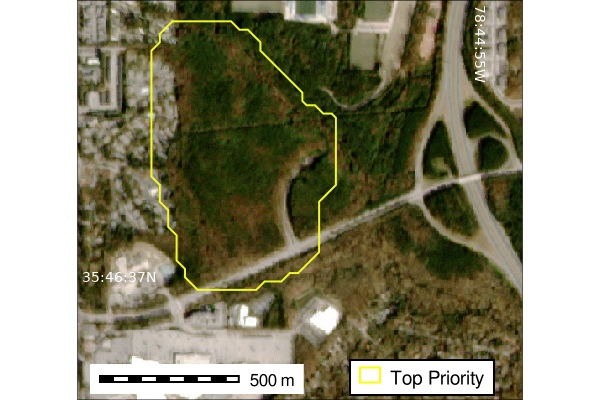

In [47]:
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa")
view_reg = gs.region("ned_19sec_site_priority_1")
view_reg_w = view_reg['w'] + 100
view_reg_n = view_reg['n'] - 300
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa", w=view_reg_w, n=view_reg_n)
ps_before_3m_cary_map = gj.GrassRenderer(filename="output/ps_before_3m_fenton_map.png")
ps_before_3m_cary_map.d_erase()
ps_before_3m_cary_map.d_rast(map="ps_before_3m_comp")
ps_before_3m_cary_map.d_vect(map="priority_queue_clean", where="rank == 1", fill_color="none", color="yellow", width="2",legend_label="Top Priority")
ps_before_3m_cary_map.d_legend_vect(at=(60,10,2,6),font="FreeSans", flags="b")
ps_before_3m_cary_map.d_barscale(at=(15,9,2,2), units="meters",font="FreeSans")
ps_before_3m_cary_map.d_grid(size="00:00:59", flags="dw", width=4, color="black",text_color="white",fontsize=14)

ps_before_3m_cary_map.show()

## Site 1 - After

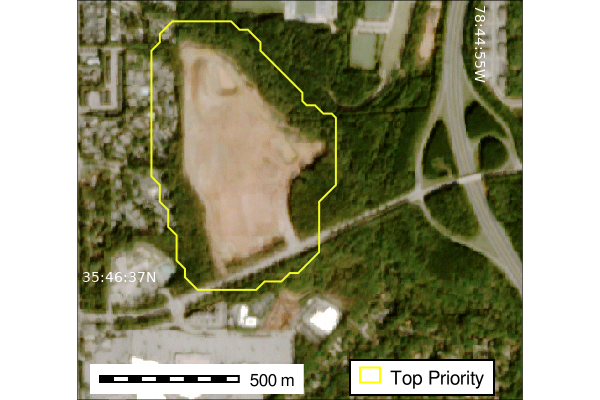

In [49]:
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa")
view_reg = gs.region("ned_19sec_site_priority_1")
view_reg_w = view_reg['w'] + 100
view_reg_n = view_reg['n'] - 300
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa", w=view_reg_w, n=view_reg_n)


priority_queue_3m_cary_map = gj.GrassRenderer(filename="output/priority_queue_3m_fenton_map.png")
priority_queue_3m_cary_map.d_erase()
priority_queue_3m_cary_map.d_rast(map="ps_after_3m_comp")
priority_queue_3m_cary_map.d_vect(map="priority_queue_clean", where="rank == 1",fill_color="none", color="yellow", width="2",legend_label="Top Priority")
priority_queue_3m_cary_map.d_legend_vect(at=(60,10,2,6),font="FreeSans", flags="b")
priority_queue_3m_cary_map.d_barscale(at=(15,9,2,2), units="meters", font="FreeSans")
priority_queue_3m_cary_map.d_grid(size="00:00:59", flags="dw", width=4, color="black",text_color="white",fontsize=14)
priority_queue_3m_cary_map.show()

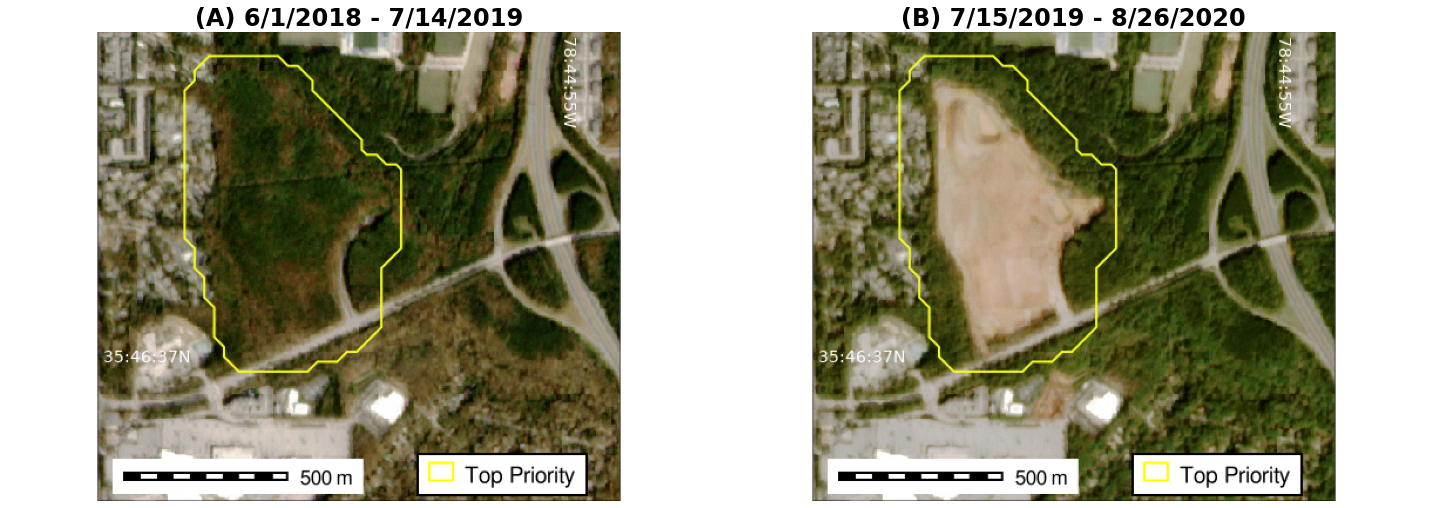

In [50]:
from PIL import Image

fig = plt.figure(figsize=(20, 18))

ax = fig.add_subplot(1, 2, 1)
fig.subplots_adjust(hspace=0, wspace=0.1)
ax.set_axis_off()
img_ortho = Image.open("output/ps_before_3m_fenton_map.png")
imgplot = plt.imshow(img_ortho)
ax.set_title('(A) 6/1/2018 - 7/14/2019',{"fontsize":24, "fontweight":"bold"})

ax = fig.add_subplot(1, 2, 2)
ax.set_axis_off()

img2 = Image.open("output/priority_queue_3m_fenton_map.png")
imgplot = plt.imshow(img2)
# imgplot.set_clim(0.0, 0.7)
ax.set_title('(B) 7/15/2019 - 8/26/2020',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/priority_queue_3m_fenton_figure.png",bbox_inches='tight')

# Figure: Priority Queue Methods

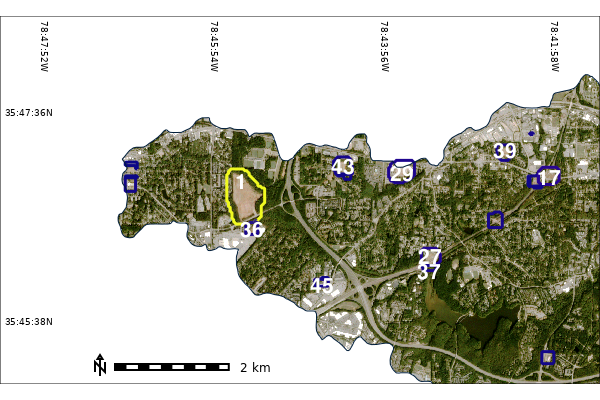

In [57]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, 
               flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_vect_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_vect(map="priority_queue_norm", fill_color="none", width=3)
priority_change_30m_map.d_vect(map="priority_queue_clean",
                               fill_color="none", color="black",
                               attribute_column="rank", 
                               where="rank <= 100",
                               label_color="white", xref="center", yref="center",
                               label_size=21, font="FreeSans:Bold")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
# priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(2,40,2,6), title="Priority (High 1 - Low 1)", title_fontsize=10)
priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=4, color="black",text_color="black")
priority_change_30m_map.show()

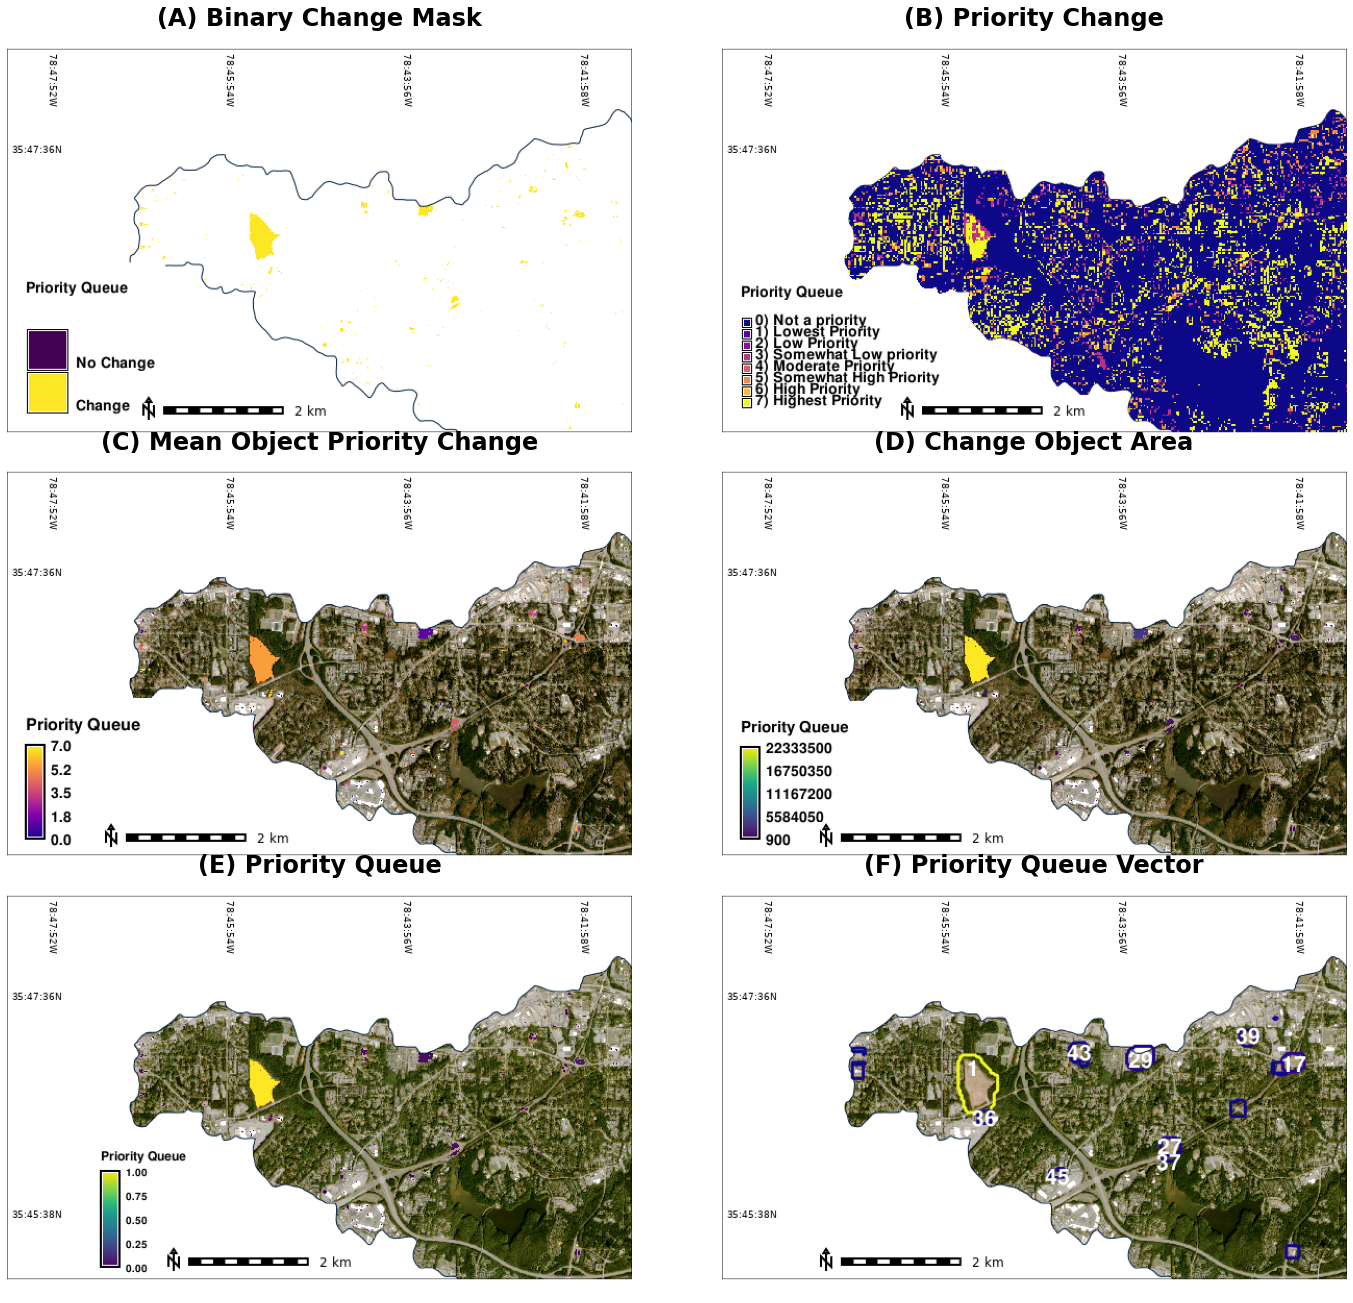

In [58]:

from PIL import Image

fig = plt.figure(figsize=(20, 18))

# ax = fig.add_subplot(2, 1, 1)
# fig.subplots_adjust(hspace=0, wspace=0.1)

grs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(grs[0, 0])
ax1.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/binary_change_mask_nw.png")
imgplot = plt.imshow(img1)
ax1.set_title('(A) Binary Change Mask',{"fontsize":24, "fontweight":"bold"})


ax2 = fig.add_subplot(grs[0,1])
ax2.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img2 = Image.open("output/priority_change_nw.png")
imgplot = plt.imshow(img2)
ax2.set_title('(B) Priority Change',{"fontsize":24, "fontweight":"bold"})

ax3 = fig.add_subplot(grs[1,0])
ax3.axis('off')
fig.subplots_adjust(hspace=5, wspace=5)

img3 = Image.open("output/mopc_nw.png")
imgplot = plt.imshow(img3)
ax3.set_title('(C) Mean Object Priority Change',{"fontsize":24, "fontweight":"bold"})

# spans two rows:
ax4 = fig.add_subplot(grs[1, 1])
ax4.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img4 = Image.open("output/object_pixel_area_nw.png")
imgplot = plt.imshow(img4)
ax4.set_title('(D) Change Object Area',{"fontsize":24, "fontweight":"bold"})

ax5 = fig.add_subplot(grs[2, 0])
ax5.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img5 = Image.open("output/priority_queue_norm_nw.png")
imgplot = plt.imshow(img5)
ax5.set_title('(E) Priority Queue',{"fontsize":24, "fontweight":"bold"})

ax6 = fig.add_subplot(grs[2, 1])
ax6.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img6 = Image.open("output/priority_queue_norm_vect_nw.png")
imgplot = plt.imshow(img6)
ax6.set_title('(F) Priority Queue Vector',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/priority_queue_alg_figure1.png",bbox_inches='tight', dpi=300)